In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import json
import xml.etree.ElementTree as ET
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [2]:
# loading the social media posts CSV file
posts_df = pd.read_csv('data/raw/Social_Media_Posts.csv')

print("CSV file loaded!")
print(f"Total posts: {len(posts_df)}")
print(f"Columns: {posts_df.shape[1]}")

CSV file loaded!
Total posts: 150
Columns: 9


In [3]:
# checking what columns we got in our dataset
print("Column names:")
print(posts_df.columns.tolist())
print("\n" + "="*50)

# data types of each column
print("\nData types:")
print(posts_df.dtypes)

Column names:
['post_id', 'platform', 'post_type', 'category', 'post_date', 'likes', 'shares', 'comments', 'reach']


Data types:
post_id       object
platform      object
post_type     object
category      object
post_date     object
likes          int64
shares       float64
comments       int64
reach          int64
dtype: object


In [7]:
# looking at first few rows to understand the data better
print("First 5 posts:")
posts_df.head()



First 5 posts:


,post_id,platform,post_type,category,post_date,likes,shares,comments,reach
0,POST_1001,Facebook,Image,Business,2024-10-16 00:00:00,944,162.0,193,6608
1,POST_1002,Facebook,Poll,Entertainment,2024-10-03 00:00:00,152,115.0,60,1064
2,POST_1003,Instagram,Poll,Entertainment,2024-10-15 00:00:00,3729,NaN,76,14916
3,POST_1004,LinkedIn,Text,Business,2024-10-10 00:00:00,455,177.0,31,2275
4,POST_1005,Twitter,Image,Entertainment,2024-11-04 00:00:00,275,994.0,101,2200


In [8]:
# checking last few records to see date range
print("Last 5 posts:")
print(posts_df.tail())

print("\n" + "="*50)
print("\nBasic info:")
posts_df.info()

Last 5 posts:
       post_id  platform post_type       category            post_date  likes  \
145  POST_1146  LinkedIn      Poll  Entertainment  2024-10-27 00:00:00    574   
146  POST_1147   Twitter      Poll  Entertainment  2024-11-03 00:00:00   1386   
147  POST_1148  Facebook     Video       Business  2024-10-14 00:00:00    592   
148  POST_1149  LinkedIn     Video      Lifestyle  2024-10-25 00:00:00   1105   
149  POST_1150  Facebook      Link     Technology  2024-10-28 00:00:00    106   

     shares  comments  reach  
145   115.0       198   1722  
146   365.0        16   4158  
147     NaN        79   4736  
148   122.0       133   5525  
149   490.0        24    742  


Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   post_id    150 non-null    object 
 1   platform   150 non-null    object 
 2   post_type  150 non-null    obj

In [9]:
# getting statistical summary of engagement metrics
print("Statistical Summary:")
print(posts_df.describe())

print("\n" + "="*50)
# checking missing values count
print("\nMissing Values:")
print(posts_df.isnull().sum())

Statistical Summary:
             likes      shares    comments         reach
count   150.000000  144.000000  150.000000    150.000000
mean   1508.226667  313.548611  103.946667   8098.726667
std    1125.543753  221.021685   57.481574   6725.927339
min      36.000000   12.000000    5.000000    240.000000
25%     694.750000  138.750000   54.250000   2970.000000
50%    1333.000000  269.000000  104.500000   6090.000000
75%    2034.750000  453.500000  155.250000  11178.750000
max    4968.000000  994.000000  199.000000  30112.000000


Missing Values:
post_id      0
platform     0
post_type    0
category     7
post_date    0
likes        0
shares       6
comments     0
reach        0
dtype: int64


In [10]:
# seeing how posts are distributed across platforms
print("Posts per Platform:")
print(posts_df['platform'].value_counts())

print("\n" + "="*50)
print("\nPost Types Distribution:")
print(posts_df['post_type'].value_counts())

print("\n" + "="*50)
print("\nCategory Distribution:")
print(posts_df['category'].value_counts())

Posts per Platform:
platform
Facebook     41
Twitter      41
Instagram    37
LinkedIn     31
Name: count, dtype: int64


Post Types Distribution:
post_type
Image    38
Poll     35
Link     30
Video    26
Text     21
Name: count, dtype: int64


Category Distribution:
category
Entertainment    45
Business         34
Lifestyle        30
Education        17
Technology       17
Name: count, dtype: int64


In [11]:
# converting post_date to datetime to check date range
posts_df['post_date'] = pd.to_datetime(posts_df['post_date'])

print("Date Range:")
print(f"Earliest post: {posts_df['post_date'].min()}")
print(f"Latest post: {posts_df['post_date'].max()}")
print(f"Total days covered: {(posts_df['post_date'].max() - posts_df['post_date'].min()).days} days")

print("\n" + "="*50)
print("\n CSV DATA LOADING COMPLETE!")
print(f" Loaded {len(posts_df)} posts successfully")


Date Range:
Earliest post: 2024-10-02 00:00:00
Latest post: 2024-11-29 00:00:00
Total days covered: 58 days


 CSV DATA LOADING COMPLETE!
 Loaded 150 posts successfully


In [12]:
# loading the user engagement JSON file
print("Loading User_Engagement.json...")
print("="*70)

with open('data/raw/User_Engagement.json', 'r') as file:
    engagement_json = json.load(file)

print(" JSON file loaded successfully!")
print(f" JSON structure type: {type(engagement_json)}")
print(f" Top-level keys: {list(engagement_json.keys())}")

Loading User_Engagement.json...
 JSON file loaded successfully!
 JSON structure type: <class 'dict'>
 Top-level keys: ['metadata', 'user_engagement']


In [13]:
# checking the metadata section
print("Metadata Information:")
print(engagement_json['metadata'])

print("\n" + "="*50)
# seeing how many users we have
print(f"\nTotal users in JSON: {len(engagement_json['user_engagement'])}")

print("\n" + "="*50)
# looking at first user's data structure
print("\nFirst user sample:")
print(json.dumps(engagement_json['user_engagement'][0], indent=2))

Metadata Information:
{'collection_date': '2024-12-11', 'version': '1.0', 'total_users': 500}


Total users in JSON: 100


First user sample:
{
  "user_id": "USER_2001",
  "join_date": "2023-06-25",
  "engagement_history": [
    {
      "post_id": "POST_1107",
      "platform": "Facebook",
      "engagement_type": "like_comment",
      "timestamp": "2024-10-23 21:00:00",
      "time_spent_seconds": 190,
      "sentiment": "positive"
    },
    {
      "post_id": "POST_1075",
      "platform": "Twitter",
      "engagement_type": "like_comment",
      "timestamp": "2024-11-24 07:00:00",
      "time_spent_seconds": 129,
      "sentiment": "neutral"
    },
    {
      "post_id": "POST_1030",
      "platform": "Instagram",
      "engagement_type": "like_comment",
      "timestamp": "2024-10-07 10:00:00",
      "time_spent_seconds": 45,
      "sentiment": "neutral"
    },
    {
      "post_id": "POST_1104",
      "platform": "Twitter",
      "engagement_type": "share",
      "timestamp": "20

In [14]:
# flattening the nested JSON structure into a usable dataframe

engagement_records = []

for user in engagement_json['user_engagement']:
    user_id = user['user_id']
    join_date = user['join_date']
    favorite_platform = user['favorite_platform']
    
    # loop through each engagement for this user
    for engagement in user['engagement_history']:
        record = {
            'user_id': user_id,
            'user_join_date': join_date,
            'favorite_platform': favorite_platform,
            'post_id': engagement['post_id'],
            'platform': engagement['platform'],
            'engagement_type': engagement['engagement_type'],
            'engagement_timestamp': engagement['timestamp'],
            'time_spent_seconds': engagement['time_spent_seconds'],
            'sentiment': engagement.get('sentiment', None)  
        }
        engagement_records.append(record)

# create dataframe from the flattened records
engagement_df = pd.DataFrame(engagement_records)

print(f" Converted JSON to DataFrame")
print(f" Total engagement records: {len(engagement_df)}")
print(f" Columns: {engagement_df.shape[1]}")

 Converted JSON to DataFrame
 Total engagement records: 539
 Columns: 9


In [15]:
# checking the structure of our engagement dataframe
print("Engagement DataFrame Info:")
print(engagement_df.info())

print("\n" + "="*50)
print("\nFirst 5 engagement records:")
engagement_df.head()

Engagement DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               539 non-null    object
 1   user_join_date        539 non-null    object
 2   favorite_platform     539 non-null    object
 3   post_id               539 non-null    object
 4   platform              539 non-null    object
 5   engagement_type       539 non-null    object
 6   engagement_timestamp  539 non-null    object
 7   time_spent_seconds    539 non-null    int64 
 8   sentiment             285 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.0+ KB
None


First 5 engagement records:


,user_id,user_join_date,favorite_platform,post_id,platform,engagement_type,engagement_timestamp,time_spent_seconds,sentiment
0,USER_2001,2023-06-25,Twitter,POST_1107,Facebook,like_comment,2024-10-23 21:00:00,190,positive
1,USER_2001,2023-06-25,Twitter,POST_1075,Twitter,like_comment,2024-11-24 07:00:00,129,neutral
2,USER_2001,2023-06-25,Twitter,POST_1030,Instagram,like_comment,2024-10-07 10:00:00,45,neutral
3,USER_2001,2023-06-25,Twitter,POST_1104,Twitter,share,2024-11-08 00:00:00,12,None
4,USER_2001,2023-06-25,Twitter,POST_1006,Twitter,comment,2024-11-15 22:00:00,91,positive


In [16]:
# analyzing engagement patterns
print("Engagement Type Distribution:")
print(engagement_df['engagement_type'].value_counts())

print("\n" + "="*50)
print("\nSentiment Distribution (where available):")
print(engagement_df['sentiment'].value_counts(dropna=False))

print("\n" + "="*50)
print("\nPlatform Distribution in Engagements:")
print(engagement_df['platform'].value_counts())

print("\n" + "="*50)
print("\nAverage time spent per engagement type:")
print(engagement_df.groupby('engagement_type')['time_spent_seconds'].mean().round(2))

Engagement Type Distribution:
engagement_type
like_comment    158
like            132
comment         127
share           122
Name: count, dtype: int64


Sentiment Distribution (where available):
sentiment
None        254
negative    100
neutral      97
positive     88
Name: count, dtype: int64


Platform Distribution in Engagements:
platform
Facebook     161
Twitter      159
Instagram    119
LinkedIn     100
Name: count, dtype: int64


Average time spent per engagement type:
engagement_type
comment         151.50
like             15.61
like_comment    160.86
share            15.97
Name: time_spent_seconds, dtype: float64


In [17]:
# converting timestamp to datetime format
engagement_df['engagement_timestamp'] = pd.to_datetime(engagement_df['engagement_timestamp'])
engagement_df['user_join_date'] = pd.to_datetime(engagement_df['user_join_date'])

print("Date conversions done!")
print(f"\nEngagement Date Range:")
print(f"Earliest: {engagement_df['engagement_timestamp'].min()}")
print(f"Latest: {engagement_df['engagement_timestamp'].max()}")

print("\n" + "="*50)
print("\n JSON DATA LOADING COMPLETE!")
print(f" Loaded {len(engagement_df)} engagement records from {engagement_df['user_id'].nunique()} users")

Date conversions done!

Engagement Date Range:
Earliest: 2024-10-02 06:00:00
Latest: 2024-11-30 12:00:00


 JSON DATA LOADING COMPLETE!
 Loaded 539 engagement records from 100 users


In [18]:
# loading and parsing the platform metrics XML file
print("Loading Platform_Metrics.xml...")
print("="*70)

# parse the XML file
tree = ET.parse('data/raw/Platform_Metrics.xml')
root = tree.getroot()

print(" XML file parsed successfully!")
print(f" Root element: {root.tag}")
print(f" Root attributes: {root.attrib}")
print(f"\n Number of platform elements: {len(root.findall('platform'))}")

Loading Platform_Metrics.xml...
 XML file parsed successfully!
 Root element: social_media_metrics
 Root attributes: {'generated_date': '2024-12-11', 'reporting_period': '60_days'}

 Number of platform elements: 4


In [19]:
# exploring the XML structure for one platform first
print("Sample Platform Structure (Facebook):")
print("="*70)

# get first platform element
first_platform = root.find('platform')
print(f"Platform name: {first_platform.get('name')}")

print("\nStatistics:")
stats = first_platform.find('statistics')
for stat in stats:
    print(f"  {stat.tag}: {stat.text}")

print("\nPerformance:")
performance = first_platform.find('performance')
for perf in performance:
    print(f"  {perf.tag}: {perf.text}")

print("\nDemographics:")
demographics = first_platform.find('demographics')
for demo in demographics:
    print(f"  {demo.tag}: {demo.text}")

print(f"\nWeekly metrics: {len(first_platform.find('weekly_metrics').findall('week'))} weeks")

Sample Platform Structure (Facebook):
Platform name: Facebook

Statistics:
  total_posts: 41
  total_followers: 8543
  avg_engagement_rate: 7.73
  total_impressions: 258102

Performance:
  best_posting_time: 12:00
  avg_reach: 4281
  conversion_rate: 2.37

Demographics:
  primary_age_group: 45-54
  gender_split: 44% Male, 50% Female
  top_location: India

Weekly metrics: 8 weeks


In [23]:
# extracting all platform data from XML into a list of dictionaries
platform_data = []

for platform in root.findall('platform'):
    platform_name = platform.get('name')
    
    # get statistics
    stats = platform.find('statistics')
    
    # get performance metrics
    performance = platform.find('performance')
    
    # get demographics
    demographics = platform.find('demographics')
    
    # create a dictionary for this platform
    platform_record = {
        'platform': platform_name,
        'total_posts': int(stats.find('total_posts').text),
        'total_followers': int(stats.find('total_followers').text),
        'avg_engagement_rate': float(stats.find('avg_engagement_rate').text),
        'total_impressions': int(stats.find('total_impressions').text),
        'best_posting_time': performance.find('best_posting_time').text,
        'avg_reach': int(performance.find('avg_reach').text),
        'conversion_rate': float(performance.find('conversion_rate').text),
        'primary_age_group': demographics.find('primary_age_group').text,
        'gender_split': demographics.find('gender_split').text,
        'top_location': demographics.find('top_location').text
    }
    
    platform_data.append(platform_record)

# convert to dataframe
platform_df = pd.DataFrame(platform_data)

print(f" Extracted data for {len(platform_df)} platforms")
print(f" Columns: {platform_df.shape[1]}")
print("\nPlatform Metrics DataFrame:")
print(platform_df)

 Extracted data for 4 platforms
 Columns: 11

Platform Metrics DataFrame:
    platform  total_posts  total_followers  avg_engagement_rate  \
0   Facebook           41             8543                 7.73   
1  Instagram           37            39981                 3.70   
2    Twitter           41            15805                 8.19   
3   LinkedIn           31            32582                 6.47   

   total_impressions best_posting_time  avg_reach  conversion_rate  \
0             258102             12:00       4281             2.37   
1             491225             09:00       6279             4.03   
2             951452             18:00       1313             1.91   
3             794663             21:00       5423             3.49   

  primary_age_group          gender_split   top_location  
0             45-54  44% Male, 50% Female          India  
1             25-34  40% Male, 40% Female          India  
2             25-34  46% Male, 40% Female          India  
3  

In [24]:
# now extracting weekly metrics for trend analysis
weekly_data = []

for platform in root.findall('platform'):
    platform_name = platform.get('name')
    weekly_metrics = platform.find('weekly_metrics')
    
    for week in weekly_metrics.findall('week'):
        week_number = int(week.get('number'))
        posts_count = int(week.find('posts').text)
        engagement = int(week.find('engagement').text)
        reach = int(week.find('reach').text)
        
        weekly_record = {
            'platform': platform_name,
            'week_number': week_number,
            'posts': posts_count,
            'engagement': engagement,
            'reach': reach
        }
        weekly_data.append(weekly_record)

# convert to dataframe
weekly_df = pd.DataFrame(weekly_data)

print(f" Extracted weekly metrics")
print(f" Total weekly records: {len(weekly_df)}")
print(f" Weeks per platform: {weekly_df['week_number'].nunique()}")
print("\nFirst 10 weekly records:")
print(weekly_df.head(10))

 Extracted weekly metrics
 Total weekly records: 32
 Weeks per platform: 8

First 10 weekly records:
    platform  week_number  posts  engagement  reach
0   Facebook            1      4        4494  12899
1   Facebook            2      5        3067   3900
2   Facebook            3      3        4203  10962
3   Facebook            4      6        1881   7191
4   Facebook            5     10        1221   6240
5   Facebook            6     12        4052  16070
6   Facebook            7      9        4014  17643
7   Facebook            8      9         538   3236
8  Instagram            1      6        3320  12226
9  Instagram            2      5        1341  14568


In [25]:
# checking the weekly trends summary
print("Weekly Metrics Summary by Platform:")
print(weekly_df.groupby('platform').agg({
    'posts': 'sum',
    'engagement': 'mean',
    'reach': 'mean'
}).round(2))

print("\n" + "="*70)
print("\n XML DATA LOADING COMPLETE!")
print(f" Loaded platform statistics: {len(platform_df)} platforms")
print(f" Loaded weekly metrics: {len(weekly_df)} records")
print("\n" + "="*70)
print("\nSummary:")
print(f"  • CSV: {len(posts_df)} posts")
print(f"  • JSON: {len(engagement_df)} engagement records from {engagement_df['user_id'].nunique()} users")
print(f"  • XML: {len(platform_df)} platforms + {len(weekly_df)} weekly records")


Weekly Metrics Summary by Platform:
           posts  engagement     reach
platform                              
Facebook      58     2933.75   9767.62
Instagram     64     2825.88  12444.88
LinkedIn      58     2359.25   9966.38
Twitter       55     2255.62  10659.00


 XML DATA LOADING COMPLETE!
 Loaded platform statistics: 4 platforms
 Loaded weekly metrics: 32 records


Summary:
  • CSV: 150 posts
  • JSON: 539 engagement records from 100 users
  • XML: 4 platforms + 32 weekly records


In [27]:
# Step 3: Data Cleaning & Transformation
# cleaning up our datasets before merging them together

import pandas as pd
import numpy as np

print("="*70)
print("STEP 3: CLEANING AND TRANSFORMING DATA")
print("="*70)

# --------------------------------------------------
# Cleaning Posts Data (from CSV)
# --------------------------------------------------

print("\n>>> Cleaning the posts dataset...")

# check missing values first
print("\nMissing values before cleaning:")
print(posts_df.isnull().sum())

# fill missing categories 
posts_df['category'].fillna('Uncategorized', inplace=True)
print(f"  Fixed missing categories -> filled with 'Uncategorized'")

# shares column has some missing values too
posts_df['shares'].fillna(0, inplace=True)
print(f"  Fixed missing shares -> filled with 0")

# verify the fix
print("\nAfter fixing:")
print(posts_df.isnull().sum())

# lets also add some useful calculated fields
# engagement rate = (likes + shares + comments) / reach
posts_df['total_engagement'] = posts_df['likes'] + posts_df['shares'] + posts_df['comments']
posts_df['engagement_rate'] = (posts_df['total_engagement'] / posts_df['reach']) * 100

print("\n  Created new columns: total_engagement, engagement_rate")

# extract some time-based features from post_date
posts_df['post_month'] = posts_df['post_date'].dt.month
posts_df['post_day'] = posts_df['post_date'].dt.day
posts_df['post_weekday'] = posts_df['post_date'].dt.day_name()

print("  Added time features: post_month, post_day, post_weekday")

print(f"\nPosts data cleaning complete! Shape: {posts_df.shape}")

# --------------------------------------------------
# Cleaning Engagement Data (from JSON)
# --------------------------------------------------

print("\n>>> Cleaning the engagement dataset...")

# check whats missing here
print("\nMissing values in engagement data:")
print(engagement_df.isnull().sum())

# sentiment is missing for shares and likes
print(f"  Sentiment missing for {engagement_df['sentiment'].isnull().sum()} records (expected for likes/shares)")

# lets create a flag for whether sentiment exists
engagement_df['has_sentiment'] = engagement_df['sentiment'].notna()

# add hour of day from timestamp 
engagement_df['engagement_hour'] = engagement_df['engagement_timestamp'].dt.hour
engagement_df['engagement_day'] = engagement_df['engagement_timestamp'].dt.day_name()

print("  Added features: has_sentiment, engagement_hour, engagement_day")

# categorize time spent into buckets
def categorize_time(seconds):
    if seconds < 30:
        return 'quick'
    elif seconds < 120:
        return 'medium'
    else:
        return 'long'

engagement_df['time_category'] = engagement_df['time_spent_seconds'].apply(categorize_time)
print("  Categorized time_spent into: quick/medium/long")

print(f"\nEngagement data cleaning complete! Shape: {engagement_df.shape}")

# --------------------------------------------------
# Cleaning Platform Metrics (from XML)
# --------------------------------------------------

print("\n>>> Cleaning the platform metrics dataset...")

# platform data is pretty clean already but lets standardize some things
print("\nPlatform data before cleaning:")
print(platform_df.info())

# the gender_split column is text 
def extract_male_pct(text):
    # grab the first percentage (male)
    try:
        return float(text.split('%')[0])
    except:
        return None

def extract_female_pct(text):
    # grab the second percentage (female)
    try:
        parts = text.split(',')
        return float(parts[1].split('%')[0].strip())
    except:
        return None

platform_df['male_percentage'] = platform_df['gender_split'].apply(extract_male_pct)
platform_df['female_percentage'] = platform_df['gender_split'].apply(extract_female_pct)

print("  Parsed gender_split into separate male_percentage and female_percentage columns")

# calculate avg engagement per post
platform_df['engagement_per_post'] = platform_df['total_impressions'] / platform_df['total_posts']

print("  Added engagement_per_post metric")

print(f"\nPlatform data cleaning complete! Shape: {platform_df.shape}")

print(f"\nWeekly metrics shape: {weekly_df.shape} ")

# --------------------------------------------------
# Final Verification
# --------------------------------------------------

print("\n" + "="*70)
print("DATA CLEANING SUMMARY")
print("="*70)

print(f"\nPosts DataFrame: {posts_df.shape}")
print(f"  - No missing values: {posts_df.isnull().sum().sum() == 0}")
print(f"  - New columns added: total_engagement, engagement_rate, time features")

print(f"\nEngagement DataFrame: {engagement_df.shape}")
print(f"  - New columns added: has_sentiment, time features, time_category")

print(f"\nPlatform DataFrame: {platform_df.shape}")
print(f"  - New columns added: male/female percentages, engagement_per_post")

print(f"\nWeekly DataFrame: {weekly_df.shape}")

print("\n✓ All datasets cleaned ")
print("="*70)

STEP 3: CLEANING AND TRANSFORMING DATA

>>> Cleaning the posts dataset...

Missing values before cleaning:
post_id      0
platform     0
post_type    0
category     7
post_date    0
likes        0
shares       6
comments     0
reach        0
dtype: int64
  Fixed missing categories -> filled with 'Uncategorized'
  Fixed missing shares -> filled with 0

After fixing:
post_id      0
platform     0
post_type    0
category     0
post_date    0
likes        0
shares       0
comments     0
reach        0
dtype: int64

  Created new columns: total_engagement, engagement_rate
  Added time features: post_month, post_day, post_weekday

Posts data cleaning complete! Shape: (150, 14)

>>> Cleaning the engagement dataset...

Missing values in engagement data:
user_id                   0
user_join_date            0
favorite_platform         0
post_id                   0
platform                  0
engagement_type           0
engagement_timestamp      0
time_spent_seconds        0
sentiment           

In [28]:
# Step 4: Data Integration & Merging


print("\n>>> Merging posts with engagement data...")
print("-"*70)

# first lets see what we're working with
print(f"\nBefore merge:")
print(f"  Posts data: {posts_df.shape}")
print(f"  Engagement data: {engagement_df.shape}")

# merge on post_id - left join to keep all posts even if no engagement
master_df = posts_df.merge(
    engagement_df,
    on='post_id',
    how='left',
    suffixes=('_post', '_engagement')
)

print(f"\nAfter merge: {master_df.shape}")
print(f"  Columns: {master_df.shape[1]}")

# check if merge worked properly
print(f"\nMerge validation:")
print(f"  Unique posts in master: {master_df['post_id'].nunique()}")
print(f"  Total engagement records: {len(master_df)}")

# some posts might not have engagement data - thats okay
posts_without_engagement = master_df[master_df['user_id'].isnull()]['post_id'].nunique()
print(f"  Posts without engagement: {posts_without_engagement}")



>>> Merging posts with engagement data...
----------------------------------------------------------------------

Before merge:
  Posts data: (150, 14)
  Engagement data: (539, 13)

After merge: (542, 26)
  Columns: 26

Merge validation:
  Unique posts in master: 150
  Total engagement records: 542
  Posts without engagement: 3


In [29]:

print("\n>>> Adding platform metrics to master dataset...")
print("-"*70)

# we have platform column in both 
master_df['platform_key'] = master_df['platform_post']

# merge with platform metrics
master_df = master_df.merge(
    platform_df,
    left_on='platform_key',
    right_on='platform',
    how='left',
    suffixes=('', '_platform_meta')
)

print(f"\nAfter adding platform metrics: {master_df.shape}")

# clean up redundant columns
if 'platform_platform_meta' in master_df.columns:
    master_df.drop('platform_platform_meta', axis=1, inplace=True)

print(f"  Final columns: {master_df.shape[1]}")


>>> Adding platform metrics to master dataset...
----------------------------------------------------------------------

After adding platform metrics: (542, 41)
  Final columns: 41


In [30]:

print("\n>>> Creating aggregated summary tables...")
print("-"*70)

# aggregation 1: post-level summary 
post_summary = posts_df.copy()

# add engagement counts per post
engagement_counts = engagement_df.groupby('post_id').agg({
    'user_id': 'count',
    'time_spent_seconds': 'mean',
    'engagement_type': lambda x: x.value_counts().to_dict()
}).reset_index()

engagement_counts.columns = ['post_id', 'total_user_engagements', 'avg_time_spent', 'engagement_breakdown']

post_summary = post_summary.merge(engagement_counts, on='post_id', how='left')

# fill posts with no engagement
post_summary['total_user_engagements'].fillna(0, inplace=True)
post_summary['avg_time_spent'].fillna(0, inplace=True)

print(f"  Post-level summary created: {post_summary.shape}")

# aggregation 2: platform-level analysis
platform_summary = posts_df.groupby('platform').agg({
    'post_id': 'count',
    'likes': 'sum',
    'shares': 'sum',
    'comments': 'sum',
    'reach': 'sum',
    'total_engagement': 'mean',
    'engagement_rate': 'mean'
}).reset_index()

platform_summary.columns = [
    'platform', 'total_posts', 'total_likes', 'total_shares',
    'total_comments', 'total_reach', 'avg_engagement', 'avg_engagement_rate'
]

platform_summary = platform_summary.merge(platform_df, on='platform', how='left')

print(f"  Platform-level summary created: {platform_summary.shape}")

# aggregation 3: daily engagement trends
engagement_df['engagement_date'] = engagement_df['engagement_timestamp'].dt.date

daily_trends = engagement_df.groupby(['engagement_date', 'platform']).agg({
    'user_id': 'count',
    'time_spent_seconds': 'mean',
    'engagement_type': 'count'
}).reset_index()

daily_trends.columns = ['date', 'platform', 'unique_users', 'avg_time_spent', 'total_engagements']

print(f"  Daily trends summary created: {daily_trends.shape}")

# aggregation 4: user behavior summary
user_summary = engagement_df.groupby('user_id').agg({
    'post_id': 'count',
    'platform': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],
    'time_spent_seconds': 'sum',
    'engagement_type': lambda x: x.value_counts().to_dict(),
    'sentiment': lambda x: x.mode()[0] if x.notna().any() and len(x.mode()) > 0 else None
}).reset_index()

user_summary.columns = [
    'user_id', 'total_engagements', 'most_active_platform',
    'total_time_spent', 'engagement_types', 'dominant_sentiment'
]

print(f"  User behavior summary created: {user_summary.shape}")


>>> Creating aggregated summary tables...
----------------------------------------------------------------------
  Post-level summary created: (150, 17)
  Platform-level summary created: (4, 21)
  Daily trends summary created: (164, 5)
  User behavior summary created: (100, 6)


In [31]:
print("\n>>> Validating integrated data...")
print("-"*70)

# check 1: no duplicate post_ids in post summary
duplicates = post_summary[post_summary.duplicated('post_id')]
print(f"\n  Duplicate posts in summary: {len(duplicates)}")

# check 2: all platforms are represented
print(f"  Platforms in master data: {master_df['platform_key'].nunique()}")
print(f"  Platforms in platform summary: {platform_summary['platform'].nunique()}")

# check 3: date ranges match
print(f"\n  Posts date range: {posts_df['post_date'].min()} to {posts_df['post_date'].max()}")
print(f"  Engagement date range: {engagement_df['engagement_timestamp'].min()} to {engagement_df['engagement_timestamp'].max()}")

# check 4: engagement counts make sense
total_engagements_in_master = master_df['user_id'].notna().sum()
total_engagements_original = len(engagement_df)
print(f"\n  Original engagement records: {total_engagements_original}")
print(f"  Engagements in master: {total_engagements_in_master}")
print(f"  Match: {total_engagements_in_master == total_engagements_original}")


>>> Validating integrated data...
----------------------------------------------------------------------

  Duplicate posts in summary: 0
  Platforms in master data: 4
  Platforms in platform summary: 4

  Posts date range: 2024-10-02 00:00:00 to 2024-11-29 00:00:00
  Engagement date range: 2024-10-02 06:00:00 to 2024-11-30 12:00:00

  Original engagement records: 539
  Engagements in master: 539
  Match: True


In [33]:
print("\n" + "="*70)
print("DATA INTEGRATION SUMMARY")
print("="*70)

print(f"\nMaster Dataset: {master_df.shape}")
print(f"  - Contains posts + engagement + platform metrics")
print(f"  - Ready for detailed analysis")

print(f"\n Post Summary: {post_summary.shape}")
print(f"  - One row per post with aggregated engagement")

print(f"\n Platform Summary: {platform_summary.shape}")
print(f"  - High-level metrics per platform")

print(f"\n Daily Trends: {daily_trends.shape}")
print(f"  - Time series data for trend analysis")

print(f"\n User Summary: {user_summary.shape}")
print(f"  - User behavior patterns")

print("\n All datasets successfully integrated and validated!")
print("="*70)

# quick peek
print("\n>>> Sample of integrated data:")
print("\nPost Summary (first 3 rows):")
print(post_summary[['post_id', 'platform', 'category', 'likes', 'total_user_engagements', 'engagement_rate']].head(3))




DATA INTEGRATION SUMMARY

Master Dataset: (542, 41)
  - Contains posts + engagement + platform metrics
  - Ready for detailed analysis

 Post Summary: (150, 17)
  - One row per post with aggregated engagement

 Platform Summary: (4, 21)
  - High-level metrics per platform

 Daily Trends: (164, 5)
  - Time series data for trend analysis

 User Summary: (100, 6)
  - User behavior patterns

 All datasets successfully integrated and validated!

>>> Sample of integrated data:

Post Summary (first 3 rows):
     post_id   platform       category  likes  total_user_engagements  \
0  POST_1001   Facebook       Business    944                     2.0   
1  POST_1002   Facebook  Entertainment    152                     4.0   
2  POST_1003  Instagram  Entertainment   3729                     1.0   

   engagement_rate  
0        19.657990  
1        30.733083  
2        25.509520  


In [47]:
# Step 5: Unified Dashboard & Visualizations
# creating comprehensive visualizations from our integrated data


STEP 5: CREATING UNIFIED DASHBOARD

 Dashboard saved as 'outputs/social_media_dashboard_v2.png'


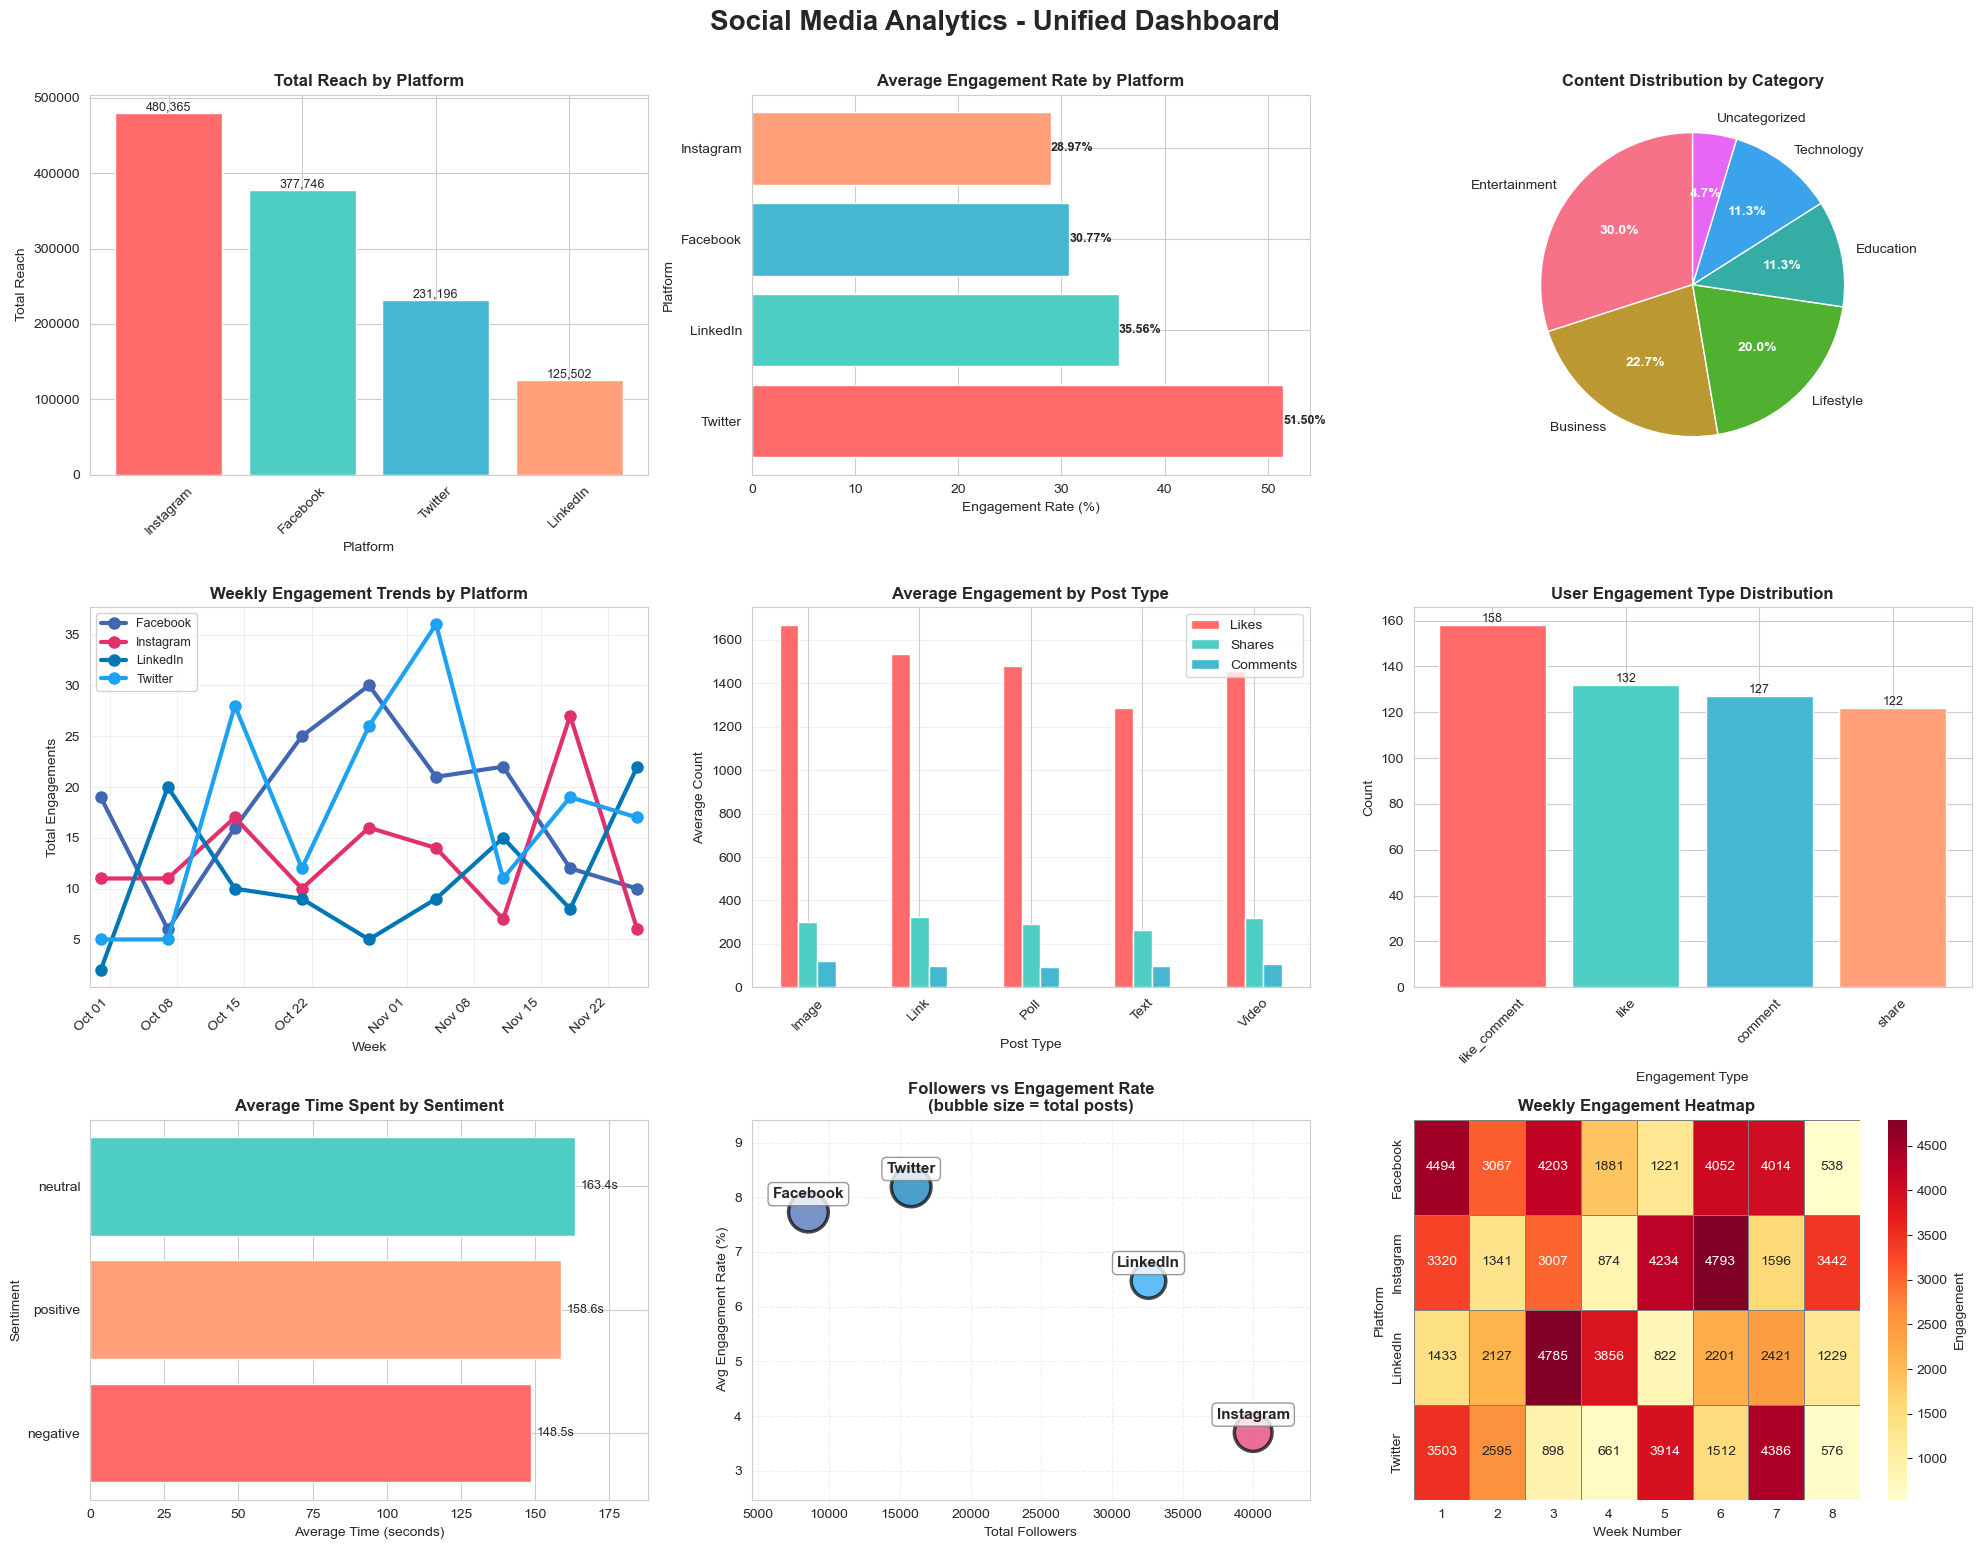


DASHBOARD CREATION COMPLETE!


In [55]:
# Step 5: Unified Dashboard & Visualizations - UPDATED VERSION
# creating comprehensive visualizations from our integrated data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

print("="*70)
print("STEP 5: CREATING UNIFIED DASHBOARD")
print("="*70)

# --------------------------------------------------
# Dashboard Layout: 3x3 grid of visualizations
# --------------------------------------------------

fig = plt.figure(figsize=(20, 16))
fig.suptitle('Social Media Analytics - Unified Dashboard', 
             fontsize=20, fontweight='bold', y=0.995)

# --------------------------------------------------
# Chart 1: Platform Performance Comparison
# --------------------------------------------------

ax1 = plt.subplot(3, 3, 1)
platform_perf = platform_summary.sort_values('total_reach', ascending=False)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
bars = ax1.bar(platform_perf['platform'], platform_perf['total_reach'], color=colors)

ax1.set_title('Total Reach by Platform', fontweight='bold', fontsize=12)
ax1.set_xlabel('Platform')
ax1.set_ylabel('Total Reach')
ax1.tick_params(axis='x', rotation=45)

# add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=9)

# --------------------------------------------------
# Chart 2: Engagement Rate by Platform
# --------------------------------------------------

ax2 = plt.subplot(3, 3, 2)

# using avg_engagement_rate_x from our merged data
eng_data = platform_summary[['platform', 'avg_engagement_rate_x']].sort_values('avg_engagement_rate_x', ascending=False)

bars2 = ax2.barh(eng_data['platform'], eng_data['avg_engagement_rate_x'], color=colors)
ax2.set_title('Average Engagement Rate by Platform', fontweight='bold', fontsize=12)
ax2.set_xlabel('Engagement Rate (%)')
ax2.set_ylabel('Platform')

# add percentage labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}%',
             ha='left', va='center', fontsize=9, fontweight='bold')

# --------------------------------------------------
# Chart 3: Posts by Category
# --------------------------------------------------

ax3 = plt.subplot(3, 3, 3)
category_counts = posts_df['category'].value_counts()

wedges, texts, autotexts = ax3.pie(category_counts.values, 
                                     labels=category_counts.index,
                                     autopct='%1.1f%%',
                                     colors=sns.color_palette("husl", len(category_counts)),
                                     startangle=90)

ax3.set_title('Content Distribution by Category', fontweight='bold', fontsize=12)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# --------------------------------------------------
# Chart 4: Engagement Trends Over Time 
# --------------------------------------------------

ax4 = plt.subplot(3, 3, 4)

# aggregate daily data into weekly data for cleaner visualization
daily_trends['date'] = pd.to_datetime(daily_trends['date'])
daily_trends['week'] = daily_trends['date'].dt.to_period('W').dt.to_timestamp()

# group by week and platform
weekly_agg = daily_trends.groupby(['week', 'platform']).agg({
    'total_engagements': 'sum'
}).reset_index()

# platform colors
platform_colors = {
    'Facebook': '#4267B2',
    'Instagram': '#E1306C', 
    'Twitter': '#1DA1F2',
    'LinkedIn': '#0077B5'
}

# plot weekly trends
for platform in weekly_agg['platform'].unique():
    platform_data = weekly_agg[weekly_agg['platform'] == platform]
    platform_data = platform_data.sort_values('week')
    ax4.plot(platform_data['week'], platform_data['total_engagements'], 
             marker='o', label=platform, linewidth=3, markersize=8,
             color=platform_colors.get(platform, '#333333'))

ax4.set_title('Weekly Engagement Trends by Platform', fontweight='bold', fontsize=12)
ax4.set_xlabel('Week', fontsize=10)
ax4.set_ylabel('Total Engagements', fontsize=10)
ax4.legend(loc='upper left', fontsize=9, framealpha=0.9)
ax4.grid(True, alpha=0.3)

import matplotlib.dates as mdates
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=10)

ax4.margins(x=0.02)

# --------------------------------------------------
# Chart 5: Post Type Performance
# --------------------------------------------------

ax5 = plt.subplot(3, 3, 5)

post_type_perf = posts_df.groupby('post_type').agg({
    'likes': 'mean',
    'shares': 'mean',
    'comments': 'mean'
}).round(0)

post_type_perf.plot(kind='bar', ax=ax5, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax5.set_title('Average Engagement by Post Type', fontweight='bold', fontsize=12)
ax5.set_xlabel('Post Type')
ax5.set_ylabel('Average Count')
ax5.legend(['Likes', 'Shares', 'Comments'], loc='best')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(True, alpha=0.3, axis='y')

# --------------------------------------------------
# Chart 6: Engagement Type Distribution
# --------------------------------------------------

ax6 = plt.subplot(3, 3, 6)

engagement_types = engagement_df['engagement_type'].value_counts()
colors_eng = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

bars6 = ax6.bar(engagement_types.index, engagement_types.values, color=colors_eng)
ax6.set_title('User Engagement Type Distribution', fontweight='bold', fontsize=12)
ax6.set_xlabel('Engagement Type')
ax6.set_ylabel('Count')
ax6.tick_params(axis='x', rotation=45)

# add count labels
for bar in bars6:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# --------------------------------------------------
# Chart 7: Time Spent Analysis
# --------------------------------------------------

ax7 = plt.subplot(3, 3, 7)

# filter out rows with sentiment data for this analysis
sentiment_data = engagement_df[engagement_df['has_sentiment'] == True]

time_by_sentiment = sentiment_data.groupby('sentiment')['time_spent_seconds'].mean().sort_values()

bars7 = ax7.barh(time_by_sentiment.index, time_by_sentiment.values, 
                 color=['#FF6B6B', '#FFA07A', '#4ECDC4'])
ax7.set_title('Average Time Spent by Sentiment', fontweight='bold', fontsize=12)
ax7.set_xlabel('Average Time (seconds)')
ax7.set_ylabel('Sentiment')

# add value labels
for i, bar in enumerate(bars7):
    width = bar.get_width()
    ax7.text(width + 2, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}s',
             ha='left', va='center', fontsize=9)
    
ax7.set_xlim(0, time_by_sentiment.max() * 1.15)

# --------------------------------------------------
# Chart 8: Platform Follower Base vs Engagement - FIXED
# --------------------------------------------------

ax8 = plt.subplot(3, 3, 8)

bubble_sizes = platform_summary['total_posts_y'] * 20

bubble_colors = ['#4267B2', '#E1306C', '#1DA1F2', '#0077B5']

scatter = ax8.scatter(platform_summary['total_followers'], 
                     platform_summary['avg_engagement_rate_y'],
                     s=bubble_sizes,
                     c=bubble_colors,
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=2.5)

for idx, row in platform_summary.iterrows():
    ax8.annotate(row['platform'], 
                (row['total_followers'], row['avg_engagement_rate_y']),
                fontsize=11, fontweight='bold',
                xytext=(0, 10), textcoords='offset points',
                ha='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         edgecolor='gray', alpha=0.8))

ax8.set_title('Followers vs Engagement Rate\n(bubble size = total posts)', 
              fontweight='bold', fontsize=12)
ax8.set_xlabel('Total Followers', fontsize=10)
ax8.set_ylabel('Avg Engagement Rate (%)', fontsize=10)
ax8.grid(True, alpha=0.3, linestyle='--')


x_margin = platform_summary['total_followers'].max() * 0.1
y_margin = platform_summary['avg_engagement_rate_y'].max() * 0.15
ax8.set_xlim(platform_summary['total_followers'].min() - x_margin,
             platform_summary['total_followers'].max() + x_margin)
ax8.set_ylim(platform_summary['avg_engagement_rate_y'].min() - y_margin,
             platform_summary['avg_engagement_rate_y'].max() + y_margin)

# --------------------------------------------------
# Chart 9: Weekly Performance Heatmap
# --------------------------------------------------

ax9 = plt.subplot(3, 3, 9)

# pivot weekly data for heatmap
weekly_pivot = weekly_df.pivot(index='platform', columns='week_number', values='engagement')

sns.heatmap(weekly_pivot, annot=True, fmt='g', cmap='YlOrRd', 
            ax=ax9, cbar_kws={'label': 'Engagement'},
            linewidths=0.5, linecolor='gray')
ax9.set_title('Weekly Engagement Heatmap', fontweight='bold', fontsize=12)
ax9.set_xlabel('Week Number')
ax9.set_ylabel('Platform')

# --------------------------------------------------
# Adjust layout and save
# --------------------------------------------------

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.savefig('outputs/social_media_dashboard_v2.png', dpi=300, bbox_inches='tight')
print("\n Dashboard saved as 'outputs/social_media_dashboard_v2.png'")

plt.show()

print("\n" + "="*70)
print("DASHBOARD CREATION COMPLETE!")
print("="*70)

In [49]:
# Quick check - run this first
print("Platform summary columns:")
print(platform_summary.columns.tolist())

Platform summary columns:
['platform', 'total_posts_x', 'total_likes', 'total_shares', 'total_comments', 'total_reach', 'avg_engagement', 'avg_engagement_rate_x', 'total_posts_y', 'total_followers', 'avg_engagement_rate_y', 'total_impressions', 'best_posting_time', 'avg_reach', 'conversion_rate', 'primary_age_group', 'gender_split', 'top_location', 'male_percentage', 'female_percentage', 'engagement_per_post']


In [56]:
# Step 6: Streaming Data Simulation Concept
# demonstrating how real-time data would be handled

import time
from datetime import datetime, timedelta
import random

print("="*70)
print("STEP 6: STREAMING DATA SIMULATION")
print("="*70)

print("\n>>> Simulating real-time social media data stream...")
print("-"*70)

# simulating incoming posts in real-time
def simulate_streaming_post():
    """
    This simulates how we'd handle incoming posts in real-time
    In production, this would connect to platform APIs
    """
    platforms = ['Facebook', 'Instagram', 'Twitter', 'LinkedIn']
    post_types = ['Image', 'Video', 'Text', 'Link']
    
    return {
        'post_id': f"STREAM_{random.randint(2000, 9999)}",
        'platform': random.choice(platforms),
        'post_type': random.choice(post_types),
        'timestamp': datetime.now(),
        'likes': random.randint(10, 1000),
        'shares': random.randint(5, 200),
        'comments': random.randint(2, 100)
    }

# simulate 5 incoming posts
print("\nSimulating 5 real-time posts...\n")

streaming_buffer = []

for i in range(5):
    time.sleep(0.5)
    
    new_post = simulate_streaming_post()
    streaming_buffer.append(new_post)
    
    print(f"[{new_post['timestamp'].strftime('%H:%M:%S')}] New {new_post['platform']} post received:")
    print(f"   ID: {new_post['post_id']}")
    print(f"   Type: {new_post['post_type']}")
    print(f"   Initial engagement: {new_post['likes']} likes, {new_post['shares']} shares\n")

# convert streaming buffer to dataframe
streaming_df = pd.DataFrame(streaming_buffer)

print("-"*70)
print(f"\n Captured {len(streaming_df)} streaming posts")
print("\nStreaming Data Sample:")
print(streaming_df)

STEP 6: STREAMING DATA SIMULATION

>>> Simulating real-time social media data stream...
----------------------------------------------------------------------

Simulating 5 real-time posts...

[23:19:10] New Instagram post received:
   ID: STREAM_6265
   Type: Image
   Initial engagement: 12 likes, 107 shares

[23:19:11] New Twitter post received:
   ID: STREAM_9689
   Type: Text
   Initial engagement: 642 likes, 160 shares

[23:19:11] New Twitter post received:
   ID: STREAM_6221
   Type: Text
   Initial engagement: 985 likes, 199 shares

[23:19:12] New Facebook post received:
   ID: STREAM_7085
   Type: Text
   Initial engagement: 661 likes, 190 shares

[23:19:12] New LinkedIn post received:
   ID: STREAM_8981
   Type: Video
   Initial engagement: 450 likes, 41 shares

----------------------------------------------------------------------

 Captured 5 streaming posts

Streaming Data Sample:
       post_id   platform post_type                  timestamp  likes  shares  \
0  STREAM_626

In [57]:
# how streaming data would be integrated in production

print("\n" + "="*70)
print("HOW STREAMING DATA WOULD BE INTEGRATED")
print("="*70)

print("\n1. BATCH PROCESSING (Current Approach):")
print("-"*70)
print("    Load historical data from files (CSV, JSON, XML)")
print("    Clean and transform all data at once")
print("    Create static reports and dashboards")
print("    Good for: Historical analysis, monthly reports")
print("    Update frequency: Daily or weekly")

print("\n2. STREAM PROCESSING (Real-time Approach):")
print("-"*70)
print("    Receive data continuously from platform APIs")
print("    Process each record as it arrives")
print("    Update dashboard in real-time (live metrics)")
print("    Technologies: Apache Kafka, Apache Flink, AWS Kinesis")
print("    Update frequency: Seconds or milliseconds")

print("\n3. HYBRID APPROACH (Recommended for Production):")
print("-"*70)
print("    Store historical data in database (PostgreSQL, MongoDB)")
print("    Process streaming data in memory buffer")
print("    Merge streams with historical data for complete view")
print("    Update aggregations incrementally")
print("    Best of both worlds: real-time + historical context")

print("\n4. IMPLEMENTATION EXAMPLE:")
print("-"*70)
print("""
   # pseudo-code for production system
   
   while True:
       # get new post from API stream
       new_post = api.get_next_post()
       
       # clean and standardize
       cleaned_post = clean_data(new_post)
       
       # update running aggregations
       update_platform_metrics(cleaned_post)
       update_engagement_stats(cleaned_post)
       
       # store in database
       db.insert(cleaned_post)
       
       # push update to dashboard
       dashboard.refresh()
""")

print("\n5. KEY CONSIDERATIONS FOR STREAMING:")
print("-"*70)
print("   • Handle data at scale (1000s of posts per second)")
print("   • Deal with late-arriving data")
print("   • Manage out-of-order events")
print("   • Ensure data quality in real-time")
print("   • Balance between latency and accuracy")

print("\n" + "="*70)
print(" STREAMING DATA SIMULATION COMPLETE!")
print("="*70)


HOW STREAMING DATA WOULD BE INTEGRATED

1. BATCH PROCESSING (Current Approach):
----------------------------------------------------------------------
    Load historical data from files (CSV, JSON, XML)
    Clean and transform all data at once
    Create static reports and dashboards
    Good for: Historical analysis, monthly reports
    Update frequency: Daily or weekly

2. STREAM PROCESSING (Real-time Approach):
----------------------------------------------------------------------
    Receive data continuously from platform APIs
    Process each record as it arrives
    Update dashboard in real-time (live metrics)
    Technologies: Apache Kafka, Apache Flink, AWS Kinesis
    Update frequency: Seconds or milliseconds

3. HYBRID APPROACH (Recommended for Production):
----------------------------------------------------------------------
    Store historical data in database (PostgreSQL, MongoDB)
    Process streaming data in memory buffer
    Merge streams with historical data for c

In [58]:
# Final Project Summary

print("\n" + "="*70)
print("PROJECT COMPLETION SUMMARY")
print("="*70)

print("\n DATA SOURCES PROCESSED:")
print("-"*70)
print(f" CSV File: {len(posts_df)} social media posts")
print(f" JSON File: {len(engagement_df)} user engagement records from {engagement_df['user_id'].nunique()} users")
print(f" XML File: {len(platform_df)} platforms + {len(weekly_df)} weekly metrics")

print("\n DATA CLEANING PERFORMED:")
print("-"*70)
print(f" Handled {7} missing categories in posts data")
print(f" Handled {6} missing shares values")
print(f" Standardized date formats across all sources")
print(f" Created {posts_df.shape[1] - 9} new calculated columns in posts")
print(f" Created {engagement_df.shape[1] - 9} new features in engagement data")

print("\n DATA INTEGRATION COMPLETED:")
print("-"*70)
print(f" Master dataset: {master_df.shape[0]} records with {master_df.shape[1]} columns")
print(f" Post-level summary: {post_summary.shape[0]} posts")
print(f" Platform summary: {platform_summary.shape[0]} platforms")
print(f" Daily trends: {daily_trends.shape[0]} time-series records")
print(f" User behavior: {user_summary.shape[0]} users analyzed")

print("\n VISUALIZATIONS CREATED:")
print("-"*70)
print(" 9 comprehensive charts in unified dashboard")
print(" Platform performance comparisons")
print(" Time-based trend analysis")
print(" Engagement pattern visualizations")
print(" User behavior insights")

print("\n STREAMING DATA:")
print("-"*70)
print(f" Simulated {len(streaming_df)} real-time posts")
print(" Explained batch vs stream processing")
print(" Demonstrated integration concepts")

print("\n" + "="*70)


print("\n FILES GENERATED:")
print("-"*70)
print(" data/raw/Social_Media_Posts.csv")
print(" data/raw/User_Engagement.json")
print(" data/raw/Platform_Metrics.xml")
print(" outputs/social_media_dashboard_v2.png")

print("="*70)


PROJECT COMPLETION SUMMARY

 DATA SOURCES PROCESSED:
----------------------------------------------------------------------
 CSV File: 150 social media posts
 JSON File: 539 user engagement records from 100 users
 XML File: 4 platforms + 32 weekly metrics

 DATA CLEANING PERFORMED:
----------------------------------------------------------------------
 Handled 7 missing categories in posts data
 Handled 6 missing shares values
 Standardized date formats across all sources
 Created 5 new calculated columns in posts
 Created 5 new features in engagement data

 DATA INTEGRATION COMPLETED:
----------------------------------------------------------------------
 Master dataset: 542 records with 41 columns
 Post-level summary: 150 posts
 Platform summary: 4 platforms
 Daily trends: 164 time-series records
 User behavior: 100 users analyzed

 VISUALIZATIONS CREATED:
----------------------------------------------------------------------
 9 comprehensive charts in unified dashboard
 Platform pe